In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"C:\Users\SURAJ\OneDrive\Desktop\New folder (2)\avg_plants_data.xlsx")
df.head()

,Bacillus,E_coli,K_pneumoniae,Proteus,S_aureus,S_pyogenes,Salmonella,Shigella,Cultures,Plants
0,14.333333,10.0,0.0,12.333333,21.333333,13.333333,15.000000,20.666667,Ethanol,Clove
1,0.000000,0.0,0.0,0.000000,12.333333,3.666667,0.000000,17.000000,Water,Clove
2,26.666667,15.0,13.0,12.333333,21.666667,8.333333,22.000000,18.333333,n_hexane,Clove
3,0.000000,0.0,0.0,16.666667,14.333333,0.000000,4.666667,14.666667,Ethanol,Cinnamon
4,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,Water,Cinnamon


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Bacillus,30.0,4.588889,7.667258,0.0,0.0,0.000000,10.333333,26.666667
E_coli,30.0,1.633333,4.509972,0.0,0.0,0.000000,0.000000,17.333333
K_pneumoniae,30.0,0.888889,3.383908,0.0,0.0,0.000000,0.000000,13.666667
Proteus,30.0,2.066667,4.817274,0.0,0.0,0.000000,0.000000,16.666667
S_aureus,30.0,9.777778,9.531289,0.0,0.0,11.333333,19.166667,26.333333
S_pyogenes,30.0,6.011111,7.797476,0.0,0.0,0.000000,13.833333,21.333333
Salmonella,30.0,2.322222,5.524923,0.0,0.0,0.000000,0.000000,22.000000
Shigella,30.0,4.355556,7.481744,0.0,0.0,0.000000,4.666667,20.666667


<AxesSubplot: xlabel='Bacillus', ylabel='Density'>

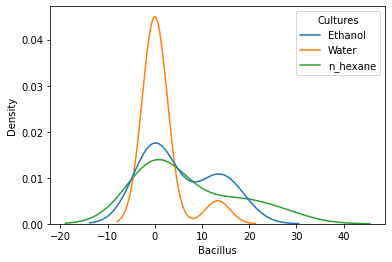

In [13]:
#pdf
sns.kdeplot(data=df,x="Bacillus",hue="Cultures")


<AxesSubplot: xlabel='Bacillus', ylabel='Proportion'>

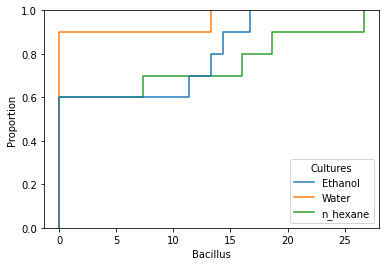

In [12]:
# cdf
sns.ecdfplot(data=df,x="Bacillus",hue="Cultures")

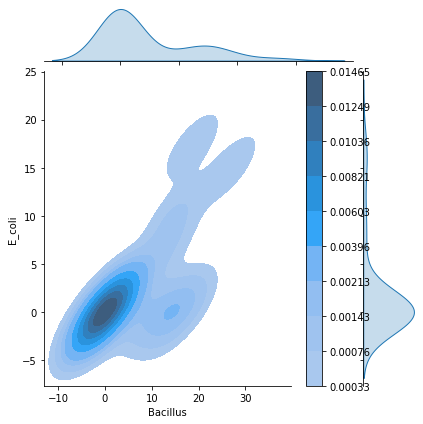

In [18]:
# denstiy plot 2-d
sns.jointplot(data=df,x="Bacillus",y="E_coli",kind="kde",fill="TRUE",cbar="TRUE")

In [ ]:
from statsmodels.multivariate.manova import MANOVA
maov = MANOVA.from_formula("Bacillus + E_coli + K_pneumoniae + Proteus + S_aureus + S_pyogenes + Salmonella +  Shigella ~ Cultures+Plants",data = df)
print(maov.mv_test())

In [ ]:
df.iloc[:,0:9]

In [ ]:
a= MANOVA.from_formula("Bacillus + E_coli + K_pneumoniae + Proteus + S_aureus + S_pyogenes + Salmonella +  Shigella ~ Plants",data = df)
print(a.mv_test())

In [ ]:
b= MANOVA.from_formula("Bacillus + E_coli + K_pneumoniae + Proteus + S_aureus + S_pyogenes + Salmonella +  Shigella ~ Cultures",data = df)
print(b.mv_test())

In [ ]:
water = df[df.Cultures == "Water"]
ethanol = df[df.Cultures == "Ethanol"]
n_hexane = df[df.Cultures == "n_hexane"]

In [ ]:
n_hexane

# One_Way_MANOVA

* Cultures Vs 8 type of bacteria 

In [ ]:
def OW_MANOVA(X,Y,Z,p):
    from scipy import stats
    a=X.shape ;b=Y.shape ; c= Z.shape
    nx = a[0] ; ny = b[0] ;nz = c[0]
    x_= np.matrix(X.mean()) ; y_ =np.matrix(Y.mean()) ; z_ = np.matrix(Z.mean())
    Sx = np.matrix(X.cov()) ; Sy = np.matrix(Y.cov()) ; Sz = np.matrix(Z.cov())
    W = ((nx-1)*Sx)+((ny-1)*Sy)+((nz-1)*Sz)
    Overall  = ((nx*x_)+(ny*y_)+(nz*z_))/(nx+ny+nz)
    t1 = nx*(x_ - Overall)*np.transpose(x_ - Overall)
    t2 =ny*(y_ - Overall)*np.transpose(y_ - Overall)
    t3 = nz*(z_ - Overall)*np.transpose(z_ - Overall)
    u1 = (nx-1)*Sx ;u2 =(ny-1)*Sy;u3= (nz-1)*Sz

    B = t1+t2+t3
    w=np.linalg.det(W); b=np.linalg.det(B+W)
    Wilk = w/b
    sqr = np.sqrt(Wilk)
    F_cal = ((((nx+ny+nz)-p-2)/p) *((1-sqr))/sqr )
    
    F_tab= stats.f.ppf(1-.01, 2*p, 2*(nx+ny+nz-p-2))


    F = stats.f(2*p , 2*(nx+ny+nz)-p-2)
    
    #j = stats.chi2.ppf(1-.01, df=16)
    #import math
    print("wilklambda",Wilk)
    #k = -(30-1-(p+3)/2)*math.log(Wilk)
    
    print('F_cal',F_cal)
    print('F_tab',F_tab)
    print("p_value",1-F.cdf(Wilk))
   

In [ ]:
s = n_hexane.iloc[:,0:8]
t = water.iloc[:,0:8]
u = ethanol.iloc[:,0:8]

In [ ]:
OW_MANOVA(s,t,u,8)

# Now, using Hotelling T2 calculated each Cultures individually

In [ ]:
# define function for hotelling T^2
def hotelling_t_2(X,Y,p):
    a=X.shape ;b=Y.shape
    nx = a[0]
    ny = b[0]
    delta = np.matrix(X.mean()- Y.mean())
    Sx = np.matrix(X.cov())
    Sy = np.matrix(Y.cov())
    S_pooled = (((nx-1)*Sx + (ny-1)*Sy)/((nx+ny)-2))
    # fot inverse of pooled
    inv_Spooled = np.linalg.inv(S_pooled)
    t_squared = ((nx*ny)/(nx+ny) *delta)*(inv_Spooled*np.transpose(delta))
    statistics = t_squared * ((nx+ny-p-1)/((nx+ny-2)*p))
    import scipy.stats as stats
    df1 = p ; df2 = (nx+ny-6-1)
    F = stats.f(p , nx+ny-p-1)
    pvalue = 1- F.cdf(statistics)
    print("Hotelling_T^2" ,t_squared)
    F_tabulated = stats.f.ppf(1-0.05, df1 ,df2)
    F_calculated = (t_squared/((p*(nx+ny-p-1))/(nx+ny-1)))
    print('F_tabulated value',F_tabulated)
    print('F_calculated',F_calculated)
    print('p_value', pvalue)
    if F_tabulated < F_calculated :
        print("there is no siginificance among the group of two generations")
    else:
        print("there is siginificance among the group of two generations")
    

In [ ]:
hotelling_t_2(water.iloc[:,0:8],n_hexane.iloc[:,0:8],8)

In [ ]:
hotelling_t_2(n_hexane.iloc[:,0:8],ethanol.iloc[:,0:8],8)

In [ ]:
n_hexane.mean()

In [ ]:
A= np.matrix(n_hexane.mean())

In [ ]:
np.transpose(A)

In [ ]:
np.matrix(n_hexane.cov())

In [ ]:
n_hexane.cov()

In [ ]:
s

# Two_Way_MANOVA

In [ ]:
np.mean(n_hexane.mean())

In [ ]:
f =np.matrix(n_hexane.iloc[:,0:8].mean())
f

In [ ]:
np.transpose(f)

In [ ]:
nx=271 ; ny= 138; nz= 107
x_=np.transpose(np.matrix([2.066,0.480,0.082,0.360])) ; y_ =np.transpose(np.matrix([2.167,0.596,0.124,0.418])) ; z_ = np.transpose(np.matrix([2.273,0.521,0.125,0.383]))
p = 4
x= [[0.291,-0.01, 0.002,0.10],[-0.01,0.11,0.00,0.003],[0.002,0.00,0.001,0.00],[0.10,0.003,0.00,0.10]]
y = [[0.561,0.011,.001,0.037],[0.011,0.025,0.004,0.007],[0.001,0.004,0.005,0.002],[0.037,0.007,0.002,0.019]]
z= [[0.261,0.03,0.003,0.018],[0.03,0.017,0,0.006],[0.003,-0,0.004,0.001],[0.018,0.006,0.001,0.013]]
Sx = np.matrix(np.array(x)); Sy=np.matrix(np.array(y)); Sz = np.matrix(np.array(z))
Overall  = ((nx*x_)+(ny*y_)+(nz*z_))/(nx+ny+nz)
t1 = nx*(x_ - Overall)*np.transpose(x_ - Overall)
t2 =ny*(y_ - Overall)*np.transpose(y_ - Overall)
t3 = nz*(z_ - Overall)*np.transpose(z_ - Overall)
B = t1+t2+t3
print(x_,y_,z_)
print(Overall)
print(B)                                          
                                                        
print(Sx)
print(Sy)
print(Sz)